In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [8]:
df = load_diabetes()

In [10]:
# print(df.DESCR)
X = df.data
Y = df.target

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
Y_pred = lr.predict(X_test)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
print("R2 SCORE  = ",r2_score(Y_test, Y_pred))
print("RMSE      = ",np.sqrt(mean_squared_error(Y_test, Y_pred)))

R2 SCORE  =  0.3322332173106186
RMSE      =  58.51717127731561


In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.0001)

In [24]:
ridge.fit(X_train, Y_train)

Ridge(alpha=0.0001)

In [29]:
Y_pred01 = ridge.predict(X_test)

In [30]:
print("R2 SCORE  = ",r2_score(Y_test, Y_pred01))
print("RMSE      = ",np.sqrt(mean_squared_error(Y_test, Y_pred01)))

R2 SCORE  =  0.33216589973903066
RMSE      =  58.52012076109884


In [40]:
x1 = 5* np.random.rand(100, 1) - 1
x2 = 0.7*x**2-2*x+3+np.random.randn(100,1)

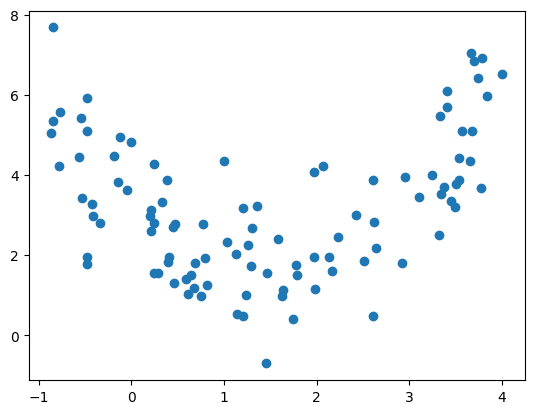

In [41]:
plt.scatter(x,y)
plt.show()

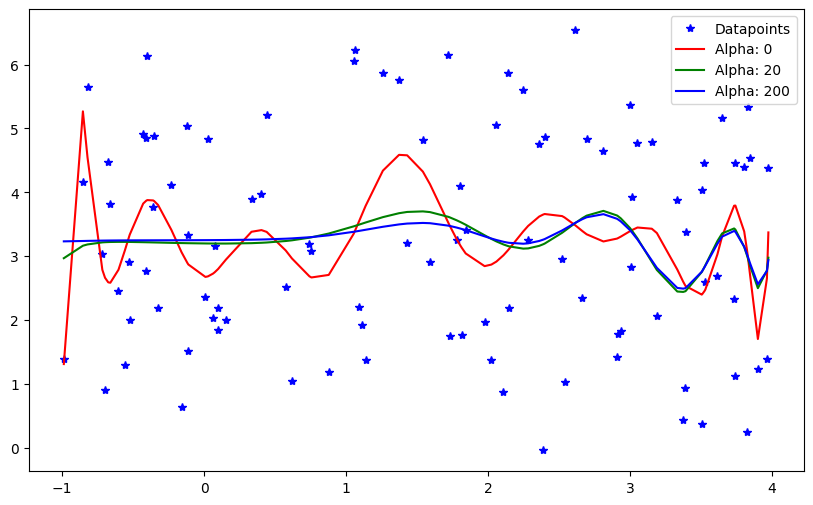

In [47]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b*', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()